In [1]:
#%matplotlib notebook
!jupyter nbextension enable --py gmaps

Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


In [2]:
#Establish dependencies
import csv, os, requests, time, gmaps, pandas as pd, matplotlib.pyplot as plt, numpy as np
from config import *
gmaps.configure(api_key=gkey)

In [3]:
#Convert and download data to CSV file
yelpapi_csv = os.path.join("yelpapidata.csv")
yelp_raw = pd.read_csv(yelpapi_csv)
yelp_raw.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,142,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/gfK2DK...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466
3,"Montgomery, Alabama",American,TmPADgXsze5_gfTZPZ24vQ,Southern Comfort,https://s3-media2.fl.yelpcdn.com/bphoto/3WRpNu...,https://www.yelp.com/biz/southern-comfort-hope...,False,193,4.5,$$,32.269824,-86.363997,210 Wasden Rd,Hope Hull,AL,36043,US,(334) 280-0012
4,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,16,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287


In [4]:
#Show descriptive statistics about Yelp Data
yelp_raw.describe()

,review_count,rating,lat,long
count,27851.000000,27851.000000,27850.000000,27850.000000
mean,177.127679,3.967398,38.425217,-92.894844
std,292.762941,0.604082,5.160674,18.784798
min,1.000000,1.000000,21.262370,-158.105524
25%,30.000000,3.500000,35.493787,-104.917115
50%,88.000000,4.000000,39.667450,-89.220339
75%,212.000000,4.500000,41.822154,-78.533204
max,9460.000000,5.000000,58.398782,157.941630


In [5]:
#Format df: also, translate price from $$ to one of the following phrases: Affordable, moderate, or expensive.
yelp_format_rd1 = yelp_raw.copy()
#yelp_format_rd1["review_count"] = yelp_format_rd1.loc[:, "review_count"].astype(float)
#yelp_format_rd1["rating"] = yelp_format_rd1.loc[:, "rating"].astype(float)
yelp_format_rd1['price_attribute'] = yelp_format_rd1['price'].replace(
    {'$': '1.Affordable', '$$': '2.Moderate', '$$$': '3.Expensive'})
yelp_format_rd1.head()

,search_city,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
0,"Montgomery, Alabama",American,BhPj9fLZph1TcofvuTZT1w,Urban Cookhouse,https://s3-media1.fl.yelpcdn.com/bphoto/XY8xxa...,https://www.yelp.com/biz/urban-cookhouse-montg...,False,142,4.5,$,32.360651,-86.157520,7712 Eastchase Pkwy,Montgomery,AL,36117,US,(334) 239-7801,1.Affordable
1,"Montgomery, Alabama",American,4uVYV49MDmm3tunRg6hnew,Stockyard Grill,https://s3-media2.fl.yelpcdn.com/bphoto/gfK2DK...,https://www.yelp.com/biz/stockyard-grill-montg...,False,51,4.5,$,32.317361,-86.350667,4500 Mobile Hwy,Montgomery,AL,36108,US,(334) 288-2575,1.Affordable
2,"Montgomery, Alabama",American,s2uIZz572lvzeeaT40xm5g,Plantation House and Garden,https://s3-media3.fl.yelpcdn.com/bphoto/E4UqZ2...,https://www.yelp.com/biz/plantation-house-and-...,False,14,4.0,$$,32.479502,-86.369687,3240 Grandview Rd,Millbrook,AL,36054,US,(334) 285-1466,2.Moderate
3,"Montgomery, Alabama",American,TmPADgXsze5_gfTZPZ24vQ,Southern Comfort,https://s3-media2.fl.yelpcdn.com/bphoto/3WRpNu...,https://www.yelp.com/biz/southern-comfort-hope...,False,193,4.5,$$,32.269824,-86.363997,210 Wasden Rd,Hope Hull,AL,36043,US,(334) 280-0012,2.Moderate
4,"Montgomery, Alabama",American,u-pZS8ZvEm8QwJIMrf1Wbw,Common Bond Brewers,https://s3-media3.fl.yelpcdn.com/bphoto/xNl0HP...,https://www.yelp.com/biz/common-bond-brewers-m...,False,16,5.0,$,32.377410,-86.313590,424 Bibb St,Montgomery,AL,36104,US,(334) 676-2287,1.Affordable


In [6]:
#Format DF columns
yelp_format_rd1.columns

Index(['search_city', 'search_cuisine', 'y_id', 'name', 'image_url', 'url',
       'closed', 'review_count', 'rating', 'price', 'lat', 'long', 'add1',
       'city', 'state', 'zip_code', 'country', 'disp_ph', 'price_attribute'],
      dtype='object')

In [7]:
#Count how many results populate for each column: Note, one restaurant does not have a lat/long combination
yelp_format_rd1.count()

search_city        27851
search_cuisine     27851
y_id               27851
name               27851
image_url          27532
url                27851
closed             27851
review_count       27851
rating             27851
price              23729
lat                27850
long               27850
add1               27496
city               27851
state              27851
zip_code           27822
country            27851
disp_ph            27251
price_attribute    23729
dtype: int64

In [8]:
#Define what type of variable is listed in each column
yelp_format_rd1.dtypes

search_city         object
search_cuisine      object
y_id                object
name                object
image_url           object
url                 object
closed                bool
review_count         int64
rating             float64
price               object
lat                float64
long               float64
add1                object
city                object
state               object
zip_code            object
country             object
disp_ph             object
price_attribute     object
dtype: object

In [9]:
#Group dataframe into capital cities
yelp_gb_cities = yelp_format_rd1.groupby(['search_city'])
yelp_gb_cities.sum().head()

,closed,review_count,rating,lat,long
search_city,,,,,
"Albany, New York",False,61218,2506.0,27242.467834,-47077.268325
"Annapolis, Maryland",False,96385,1912.0,19436.953223,-38130.413818
"Atlanta, Georgia",False,287240,3898.0,32554.059412,-81150.804242
"Augusta, Maine",False,15429,1021.0,11696.821371,-18341.337151
"Austin, Texas",False,299061,3792.0,27810.980645,-89635.319822


In [10]:
#Group data frame into cuisine type
yelp_gb_cuisines = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisines.sum().head()

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,0.0,658067,9574.5,93656.108174,-222832.643590
Cajun,0.0,364110,5698.0,56090.625394,-139019.652525
Caribbean,0.0,89119,3081.5,29446.371743,-67662.051855
Chinese,0.0,215002,7071.0,73497.901854,-178476.610595
French,0.0,251601,4517.5,43102.898712,-105380.021478


In [11]:
#Group Yelp API data by price
yelp_gb_price = yelp_format_rd1.groupby(['price'])
yelp_gb_price.sum().head()

,closed,review_count,rating,lat,long
price,,,,,
$,2.0,736368,26193.5,257384.932815,-6.172942e+05
$$,0.0,3755842,62684.0,611843.526283,-1.491098e+06
$$$,0.0,334326,4027.0,38330.086618,-9.183231e+04
$$$$,0.0,30459,460.0,3951.409992,-1.070779e+04


In [12]:
#Group data by city, count the number of results returned for each column
yelp_gb_citiescount = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiescount.count().head()

,search_cuisine,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
search_city,,,,,,,,,,,,,,,,,,
"Albany, New York",638,638,638,628,638,638,638,638,531,638,638,632,638,638,638,638,622,531
"Annapolis, Maryland",498,498,498,496,498,498,498,498,437,498,498,490,498,498,498,498,493,437
"Atlanta, Georgia",962,962,962,960,962,962,962,962,851,962,962,960,962,962,962,962,947,851
"Augusta, Maine",264,264,264,253,264,264,264,264,210,264,264,264,264,264,264,264,261,210
"Austin, Texas",917,917,917,915,917,917,917,917,768,917,917,910,917,917,916,917,890,768


In [13]:
#Group data by cuisine type, count number of results returned 
yelp_gb_cuisinescount = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinescount.count().head()

,search_city,y_id,name,image_url,url,closed,review_count,rating,price,lat,long,add1,city,state,zip_code,country,disp_ph,price_attribute
search_cuisine,,,,,,,,,,,,,,,,,,
American,2396,2396,2396,2368,2396,2396,2396,2396,2039,2396,2396,2392,2396,2396,2396,2396,2346,2039
Cajun,1491,1491,1491,1479,1491,1491,1491,1491,1281,1491,1491,1470,1491,1491,1491,1491,1451,1281
Caribbean,764,764,764,738,764,764,764,764,532,764,764,724,764,764,761,764,735,532
Chinese,1914,1914,1914,1887,1914,1914,1914,1914,1716,1914,1914,1912,1914,1914,1913,1914,1883,1716
French,1118,1118,1118,1111,1118,1118,1118,1118,1018,1118,1118,1111,1118,1118,1117,1118,1097,1018


In [14]:
#Show the average number of reviews and ratings by city, (And average coordinates!)
yelp_gb_citiesavg = yelp_format_rd1.groupby(['search_city'])
yelp_gb_citiesavg.mean().head()

,closed,review_count,rating,lat,long
search_city,,,,,
"Albany, New York",0.0,95.952978,3.927900,42.699793,-73.788822
"Annapolis, Maryland",0.0,193.544177,3.839357,39.030027,-76.567096
"Atlanta, Georgia",0.0,298.586279,4.051975,33.839979,-84.356345
"Augusta, Maine",0.0,58.443182,3.867424,44.306142,-69.474762
"Austin, Texas",0.0,326.129771,4.135224,30.328223,-97.748440


In [15]:
#Show the average number of reviews, average rating, (and average coordinates!) for each cuisine
yelp_gb_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine'])
yelp_gb_cuisinesavg.mean().head()

,closed,review_count,rating,lat,long
search_cuisine,,,,,
American,0.0,274.652337,3.996035,39.088526,-93.001938
Cajun,0.0,244.205231,3.821596,37.619467,-93.239204
Caribbean,0.0,116.647906,4.033377,38.542371,-88.562895
Chinese,0.0,112.331243,3.694357,38.400158,-93.247968
French,0.0,225.045617,4.040698,38.553577,-94.257622


In [16]:
#Show the average number of reviews and ratings for each cuisine, in each city
yelp_gb2_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb2_citiesavg.mean().head()

closed  review_count    rating        lat  \
search_city      search_cuisine                                              
Albany, New York American           0.0    138.660000  4.090000  42.687656   
                 Cajun              0.0    134.363636  3.681818  42.712528   
                 Caribbean          0.0     21.583333  3.625000  42.700434   
                 Chinese            0.0     85.920000  3.570000  42.686607   
                 French             0.0     71.071429  3.964286  42.704651   

                                      long  
search_city      search_cuisine             
Albany, New York American       -73.781079  
                 Cajun          -73.783241  
                 Caribbean      -73.791653  
                 Chinese        -73.793954  
                 French         -73.786837

In [17]:
#Show the average number of reviews and average rating for each city, grouped by cuisine
yelp_gb2_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb2_cuisinesavg.mean().head()

closed  review_count  rating        lat  \
search_cuisine search_city                                                    
American       Albany, New York        0.0        138.66    4.09  42.687656   
               Annapolis, Maryland     0.0        281.00    3.99  38.976601   
               Atlanta, Georgia        0.0        708.70    4.20  33.799748   
               Augusta, Maine          0.0         47.28    4.00  44.354949   
               Austin, Texas           0.0        657.44    4.24  30.331474   

                                         long  
search_cuisine search_city                     
American       Albany, New York    -73.781079  
               Annapolis, Maryland -76.507178  
               Atlanta, Georgia    -84.392725  
               Augusta, Maine      -69.726458  
               Austin, Texas       -97.749226

In [18]:
#Same thing as above- this is the average review, and rating, for each cuisine, grouped by city
yelp_gb3_citiesavg = yelp_format_rd1.groupby(['search_city','search_cuisine'])
yelp_gb3_citiesavg.mean().head()

closed  review_count    rating        lat  \
search_city      search_cuisine                                              
Albany, New York American           0.0    138.660000  4.090000  42.687656   
                 Cajun              0.0    134.363636  3.681818  42.712528   
                 Caribbean          0.0     21.583333  3.625000  42.700434   
                 Chinese            0.0     85.920000  3.570000  42.686607   
                 French             0.0     71.071429  3.964286  42.704651   

                                      long  
search_city      search_cuisine             
Albany, New York American       -73.781079  
                 Cajun          -73.783241  
                 Caribbean      -73.791653  
                 Chinese        -73.793954  
                 French         -73.786837

In [19]:
#Also same thing as above: this is the average review and rating for each city, grouped by cuisine
yelp_gb3_cuisinesavg = yelp_format_rd1.groupby(['search_cuisine','search_city'])
yelp_gb3_cuisinesavg.mean().head()

closed  review_count  rating        lat  \
search_cuisine search_city                                                    
American       Albany, New York        0.0        138.66    4.09  42.687656   
               Annapolis, Maryland     0.0        281.00    3.99  38.976601   
               Atlanta, Georgia        0.0        708.70    4.20  33.799748   
               Augusta, Maine          0.0         47.28    4.00  44.354949   
               Austin, Texas           0.0        657.44    4.24  30.331474   

                                         long  
search_cuisine search_city                     
American       Albany, New York    -73.781079  
               Annapolis, Maryland -76.507178  
               Atlanta, Georgia    -84.392725  
               Augusta, Maine      -69.726458  
               Austin, Texas       -97.749226

In [20]:
#This is where we are going to start charting, I have provided some exmaples for you. 

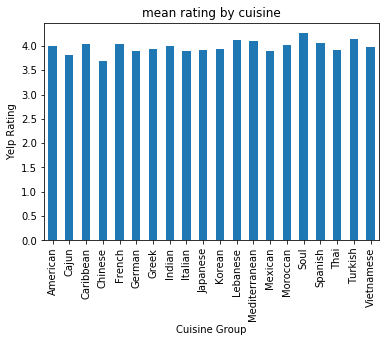

<Figure size 432x288 with 0 Axes>

In [21]:
#From here, we created a chart to show the mean yelp rating by cuisine: 
chartme1 = yelp_gb_cuisinesavg['rating'].mean()
cuisine_chart = chartme1.plot(kind='bar', title='mean rating by cuisine')
cuisine_chart.set_xlabel("Cuisine Group")
cuisine_chart.set_ylabel("Yelp Rating")

plt.show()
plt.tight_layout()

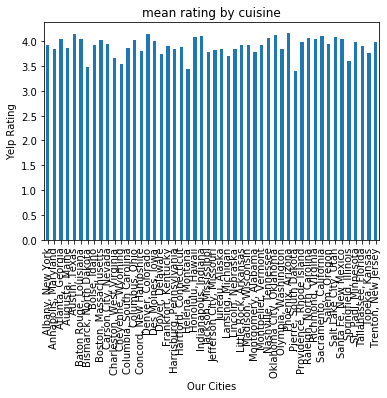

<Figure size 432x288 with 0 Axes>

In [22]:
#Average rating by cuising
chartme2 = yelp_gb_citiesavg['rating'].mean()
cuisine_chart = chartme2.plot(kind='bar', title='mean rating by cuisine')
cuisine_chart.set_xlabel("Our Cities")
cuisine_chart.set_ylabel('Yelp Rating')

plt.show()
plt.tight_layout()

In [23]:
#For Clinton

In [24]:
#Count of cuisines in capital cities
variable = yelp_gb_cuisinescount['review_count'].sum()
variable

#cuisines_label = variable['search_cuisine'].values.tolist()
#cuisines_label

search_cuisine
American         658067
Cajun            364110
Caribbean         89119
Chinese          215002
French           251601
German           159661
Greek            194577
Indian           179828
Italian          384256
Japanese         333234
Korean           259125
Lebanese         153168
Mediterranean    192793
Mexican          346125
Moroccan          80659
Soul             195123
Spanish          197642
Thai             287673
Turkish          150554
Vietnamese       240866
Name: review_count, dtype: int64

In [25]:
#Count the number of restaurants, grouped by cuisine, in a specific city, i.e. Albany, New York
specific_city = 'Albany, New York'
yelp_gb_cc_city = yelp_format_rd1[yelp_format_rd1['search_city'] == specific_city].groupby(['search_cuisine'])
variable2 = yelp_gb_cc_city['review_count'].sum()
variable2

search_cuisine
American         6933
Cajun            2956
Caribbean         518
Chinese          4296
French            995
German           1550
Greek            3446
Indian           2665
Italian          5191
Japanese         5136
Korean           4701
Lebanese          827
Mediterranean    2366
Mexican          5253
Moroccan         1036
Soul             2239
Spanish           857
Thai             5403
Turkish          1018
Vietnamese       3832
Name: review_count, dtype: int64

In [26]:
# For Nell

In [27]:
#Create a data frame for a specific city, i.e. Phoenix, Arizona.  Show the number of ratings and the coordinates
specific_city = 'Phoenix, Arizona'
yelp_gmaps = yelp_format_rd1[yelp_format_rd1['search_city'] == specific_city]
yelp_gmaps = yelp_gmaps[['lat','long','review_count']]
yelp_gmaps.head()

,lat,long,review_count
476,33.460210,-112.070420,20
477,33.458812,-112.070364,601
478,33.509031,-112.071295,1677
479,33.447392,-112.072831,2393
480,33.560850,-112.116190,3357


In [28]:
#Create a heatmap of the restaurant distribution in Phoenix, Arizona
fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(
    yelp_gmaps[['lat','long']],
    weights=yelp_gmaps['review_count'],
    max_intensity=100,
    point_radius=6.0
)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [29]:
#Show a hybrid heat map of Phoenix, AZ restaurants 
fig = gmaps.figure(map_type='HYBRID')
heatmap_layer = gmaps.heatmap_layer(
    yelp_gmaps[['lat','long']],
    weights=yelp_gmaps['review_count'],
    max_intensity=30,
    point_radius=3.0
)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [30]:
#Show a satellite map of restaurants in Phoeniz, AZ
fig = gmaps.figure(map_type='SATELLITE')
heatmap_layer = gmaps.heatmap_layer(
    yelp_gmaps[['lat','long']],
    weights=yelp_gmaps['review_count'],
    max_intensity=30,
    point_radius=3.0
)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [31]:
#Create a data frame that shows the review count and coordinate of all Mexican restaurants in Phoenix, Arizona
specific_city = 'Phoenix, Arizona'
specific_cuisine = 'Mexican'
yelp_gmaps = yelp_format_rd1[yelp_format_rd1['search_city'] == specific_city]
yelp_gmaps = yelp_gmaps[yelp_gmaps['search_cuisine'] == specific_cuisine]
yelp_gmaps = yelp_gmaps[['lat','long','review_count']]
yelp_gmaps.dropna()
yelp_gmaps.count()

lat             50
long            50
review_count    50
dtype: int64

In [32]:
#Create a heat map of the distribution of Mexican restaurants in Phoenix, Arizona
fig = gmaps.figure()#(map_type='SATELLITE')
heatmap_layer = gmaps.heatmap_layer(
    yelp_gmaps[['lat','long']],
    weights=yelp_gmaps['review_count'],
    max_intensity=100,
    point_radius=7.0
)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [33]:
fig = gmaps.figure()
fig

Figure(layout=FigureLayout(height='420px'))